In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams["svg.fonttype"] = "none"


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




Male



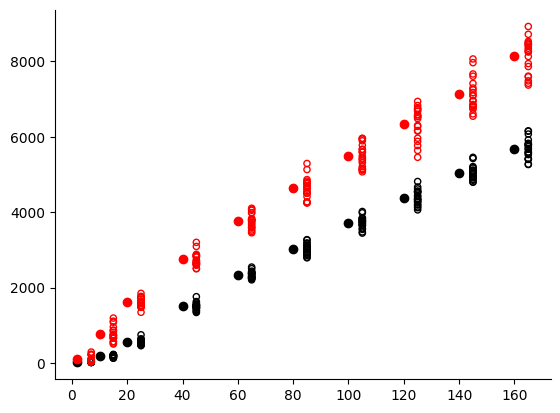


Female



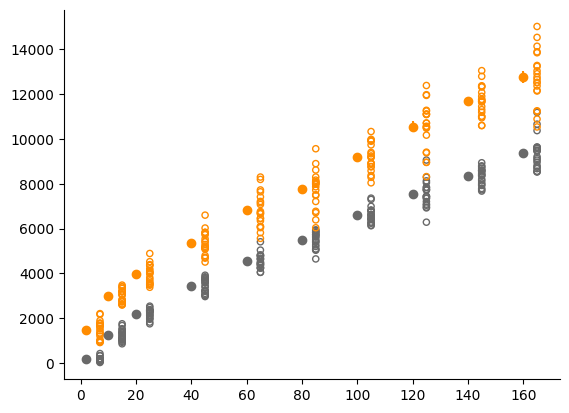

In [4]:
#Build results figures of Male and Female networks


time_tot=2000 #simulation time of one trial in ms
dt=0.5 #time step
dot_nb=int(time_tot/dt) #nb of dot in one simulation trial

for animal_sex in ["Male","Female"]: 

    print()
    print(animal_sex)
    print()

    df_pyr = pd.read_excel(animal_sex+'_network_results.xlsx', sheet_name='spike_nb_pyr',index_col=0)
    df_int = pd.read_excel(animal_sex+'_network_results.xlsx', sheet_name='spike_nb_int',index_col=0)

    #build list of column name representing the probability of external EPSPs for the different simulations conditions    
    list_col_name = list(df_pyr)
    list_prob_true=[]
    for col_name in list_col_name:
        prob_true = col_name.split('_')[0]
        if float(prob_true) not in list_prob_true:
            list_prob_true.append(float(prob_true))
    
    for prob_true in list_prob_true:

        sham_found=False
        lnio_found=False
        for col_name in list_col_name:
            if str(prob_true) in col_name and 'SHAM' in col_name:
                list_trans_sham = []
                for ele1,ele2 in zip(df_pyr[col_name],df_int[col_name]):
                    list_trans_sham.append(ele1+ele2)
                mean_sham = np.mean(list_trans_sham)
                sem_sham = scipy.stats.sem(list_trans_sham)
                sham_found=True
            elif str(prob_true) in col_name and 'LNIO' in col_name:
                list_trans_lnio = []
                for ele1,ele2 in zip(df_pyr[col_name],df_int[col_name]):
                    list_trans_lnio.append(ele1+ele2)
                mean_lnio = np.mean(list_trans_lnio)
                sem_lnio = scipy.stats.sem(list_trans_lnio)
                lnio_found=True
            
            if sham_found==True and lnio_found==True:
                
                freq_stim = prob_true*dot_nb/(time_tot/1000)
                if animal_sex=='Male':
                    plt.errorbar(freq_stim,mean_sham,yerr=sem_sham,xerr=0,fmt='ko')
                    plt.errorbar(freq_stim,mean_lnio,yerr=sem_lnio,xerr=0,fmt='ro')
                elif animal_sex=='Female':
                    plt.errorbar(freq_stim,mean_sham,yerr=sem_sham,xerr=0,fmt='o',color='dimgrey')
                    plt.errorbar(freq_stim,mean_lnio,yerr=sem_lnio,xerr=0,fmt='o',color='darkorange')
                for ele in list_trans_sham:
                    if animal_sex=='Male':
                        plt.scatter(freq_stim+5, ele, s=20, facecolors='none', edgecolors='k')
                    elif animal_sex=='Female':
                        plt.scatter(freq_stim+5, ele, s=20, facecolors='none', edgecolors='dimgrey')
                for ele in list_trans_lnio:
                    if animal_sex=='Male':
                        plt.scatter(freq_stim+5, ele, s=20, facecolors='none', edgecolors='r')
                    elif animal_sex=='Female':
                        plt.scatter(freq_stim+5, ele, s=20, facecolors='none', edgecolors='darkorange')
                sham_found=False
                lnio_found=False
                
                    
    plt.savefig('Network_model_'+animal_sex+'.svg')    
    plt.show()